In [1]:
# Load libraries

import numpy as np
import os
import csv
# import pylab
# import seaborn
# import scipy.stats as sp
import pickle
# import imageio
# from scipy.spatial import distance
# import json
from collections import OrderedDict
# import os.path as osp
import pandas as pd
# import copy
import scipy.stats as ss
# import sys
import matplotlib.pyplot as plt
import json
from datetime import date
import seaborn

In [2]:
# Experimental data loading

def get_all_runs(logdir, minlen=20):
    #print(logdir)
    """
    Recursively look through logdir and load experimental log files
    """
    datasets = []
    for root, _, files in os.walk(logdir):
        if 'log.csv' in files:
            run_name = root[8:]
            exp_name = None
            
            # 1 - load a config file containing hyperparameters
            config = None
            config_path = open(os.path.join(root,'config.json'))
            config = json.load(config_path)
            if 'exp_name' in config:
                exp_name = config['exp_name']       
            
            # 2 - load train data
            print(os.path.join(root,'log.csv'))
            exp_data = pd.read_csv(os.path.join(root,'log.csv'))
            #exp_data = exp_data[::load_subsample_step]
            data_dict = exp_data.to_dict("list")
            
            # 3 - try to load periodic test data
            if 'tests.pkl' in files:
                test_data = pickle.load(open(os.path.join(root,"tests.pkl"), "rb"))
                data_dict.update(test_data)
            
            data_dict['config'] = config
                
            nb_epochs = len(data_dict['frames'])
            print('{} -> {}'.format(run_name, nb_epochs))


            datasets.append(data_dict)
    return datasets

def get_datasets(rootdir, load_only=""):
    _, models_list, _ = next(os.walk(rootdir))
    print(models_list)
    for dir_name in models_list.copy():
        # add "ignore" in a directory name to avoid loading its content
        if "ignore" in dir_name or load_only not in dir_name:
            models_list.remove(dir_name)
    for expe_name in list(labels.keys()):
        if expe_name not in models_list:
            del labels[expe_name]
            
    # setting per-model type colors    
    for i,m_name in enumerate(models_list):
        for m_type, m_color in per_model_colors.items():
            if m_type in m_name:
                colors[m_name] = m_color
        print("extracting data for {}...".format(m_name))
        m_id = m_name
        models_saves[m_id] = OrderedDict()
        models_saves[m_id]['data'] = get_all_runs(rootdir+m_name)
        print("done")
        if m_name not in labels:
            if 'ALP-GMM' in m_name:
                labels[m_name] = 'ALP-GMM'
            elif 'Oracle' in m_name:
                labels[m_name] = 'Oracle'
            else:
                labels[m_name] = m_name

    """
    retrieve all experiences located in "data to vizu" folder
    """
default_colors = ["orange","magenta",'green','black',u'#ff7f0e',
                      "cyan", "pink", u'#1f77b4',"grey","r",
                     "darkorchid","sienna","blue","magenta", "indigo","mediumseagreen",'aqua',
                'deeppink','silver','khaki','goldenrod','y','y','y','y','y','y','y','y','y','y','y','y' ]  + ['y']*50
labels = OrderedDict()
per_model_colors = OrderedDict()
# per_model_colors = OrderedDict([('ALP-GMM',u'#1f77b4'),
#                                 ('hmn','pink'),
#                                 ('ADR','black')])

# LOAD DATA
models_saves = OrderedDict()
colors = OrderedDict()
#get_datasets("storage/final_coinThief_env_exps/"/,load_only='05')
get_datasets("storage/", load_only="22-09_PPO_RND")
#get_datasets("storage/",load_only='25-05')
#"#NeurIPS_2020/metacl_campain_2/")
print(per_model_colors)
print(labels)
if per_model_colors:  # order runs for legend order as in per_models_colors, with corresponding colors
    ordered_labels = OrderedDict()
    for teacher_type in per_model_colors.keys():
        for k,v in labels.items():
            if teacher_type in k:
                ordered_labels[k] = v
    labels = ordered_labels
else:
    print('not using per_model_color')
    for k in models_saves.keys():
        labels[k] = k
        
print(labels)
print(colors)

['08-05_CEB_Teach_100_env_MiniGrid-TeachingGamesDemonstrating100TwoSwitches-8x8-v0_multi-modal-babyai11-agent_arch_original_endpool_res_custom-ppo-2_exploration-bonus-type_cell_exploration-bonus-params_3_50', '22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0', '07-05_Teach_100_env_MiniGrid-TeachingGamesSpeaking100TwoSwitches-8x8-v0_multi-modal-babyai11-agent_arch_original_endpool_res_custom-ppo-2_exploration-bonus-type_grid_exploration-bonus-params_0.5_50', '19-05_500K_HELP_env_MiniGrid-Exiter-8x8-v0_multi-modal-babyai11-agent_arch_original_endpool_res_custom-ppo-2_exploration-bonus-type_cell_exploration-bonus-params_3_50_exploration-bonus-tanh_0.6', '24-05_NeurIPS_DiverseExit_NO_BONUS_env_MiniGrid-DiverseExit-8x8-v0_multi-modal-babyai11-agent_arch_original_endpool_res_custom-ppo-2', '22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1 -> 48


22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
stora

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/1 -

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-m

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/5 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_100

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -> 48


22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-g

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_Mi

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinT

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm

storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_Mi

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-rewar

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
stora

storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48


storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm

done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v

storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-gra

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkIt

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_Min

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm

storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_Min

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/4 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-Ta

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinT

storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-re

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/2 -> 48


22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGr

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-no

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkIt

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_

storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThi

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniG

storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_e

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPo

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/4 -

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-gra

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22

storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-Co

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_

storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48


22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinT

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-

done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_en

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniG

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
stora

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/6 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/3 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/2 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0/6 -

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0/0 -> 48
stora

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-CoinThief-8x8-v0/5 -> 48
done
extracting data for 22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0...
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-CoinThief-8x8-v0/7 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000

22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_20_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/1 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/4/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-T

22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/4 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/0/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/0 -> 48
storage/22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20_env_MiniGrid-TalkItOutPolite-8x8-v0/5/log.csv
22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_20

In [3]:
# prints keys of data_dict
m_id_1 = '19-07_PPO_tuning_frames-per-proc_40_lr_0.001_entropy-coef_0.05_recurrence_5_epochs_4_batch-size_640_env_MiniGrid-TalkItOutPolite-8x8-v0'
m_id_2 = '12-07_PPO_tuning_frames-per-proc_20_lr_0.001_entropy-coef_0_recurrence_10_epochs_8_batch-size_640_env_MiniGrid-CoinThief-8x8-v0'
print(models_saves[m_id_1]['data'][0]['frames'][-1])
print(models_saves[m_id_2]['data'][0]['frames'][-1])

KeyError: '19-07_PPO_tuning_frames-per-proc_40_lr_0.001_entropy-coef_0.05_recurrence_5_epochs_4_batch-size_640_env_MiniGrid-TalkItOutPolite-8x8-v0'

In [4]:
# Plot utils
    
def plot_with_shade(subplot_nb, ax,x,y,err,color,shade_color,label,
                  y_min=None,y_max=None, legend=False, leg_size=30, leg_loc='best', title=None,
                  ylim=[0,100], xlim=[0,40], leg_args={}, leg_linewidth=13.0, linewidth=10.0, ticksize=20,
                   zorder=None, xlabel='perf',ylabel='env steps'):
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=3)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.plot(x,y, color=color, label=label,linewidth=linewidth,zorder=zorder)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.2)
    if legend:
        leg = ax.legend(loc=leg_loc, **leg_args) #34
        for legobj in leg.legendHandles:
            legobj.set_linewidth(leg_linewidth)
    ax.set_xlabel(xlabel, fontsize=30)
    if subplot_nb == 0:
        ax.set_ylabel(ylabel, fontsize=30,labelpad=-4)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if title:
        ax.set_title(title, fontsize=22)
        
def plot_boxplot(d, labels, ax, colors, ylim=[0,60], label_size=20):

    print(labels)
    print(colors)
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=label_size)
    medianprops = dict(linewidth=3.5, color='gold')
    bplot = ax.boxplot(d, labels=list(labels), patch_artist=True,
                      medianprops=medianprops)#, labels.items(), ax[0],colors)#whis=[5,95]
    
    # rectangular box plot
#     bplot1 = axes[0].boxplot(all_data,
#                              vert=True,  # vertical box alignment
#                              patch_artist=True,  # fill with color
#                              labels=labels)  # will be used to label x-ticks
#     axes[0].set_title('Rectangular box plot')

    # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    ax.set_ylabel('% Mastered env', fontsize=20)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label, legend=False, title=None,
                        xlim=[0,40],ylim=[0,100]):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=30)
    #print(ys)
            
    median = np.median(np.array(ys), axis=0)
    #print(median)
    for k,y in enumerate(ys):
        #print("max:{} last:{}".format(max(y), y[-1]))
        ax.plot(x[0:min_len],y, color=color, linewidth=1.5, alpha=0.5)
    ax.plot(x[0:min_len],median, color=color, linewidth=7 , label=label)
    if legend:
        leg = ax.legend(loc='bottom right', fontsize=25)
    ax.set_xlabel('Million steps', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('% Mastered env', fontsize=18)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if title:
        ax.set_title(title, fontsize=22)
        
def get_percentiles(data, label, max_ep=100):
    nb_zero_perf = np.count_nonzero(data[:max_ep]==0.0)
    print('{} -> nb zeros: {}'.format(label, nb_zero_perf))
    print('{} -> percentile: {}'.format(label, np.percentile(data[:max_ep],[25,50,75,90])))

def get_welch(algo_0='amb', algo_1='rmb', epoch=0, metric='nb_mastered', verbose=True):
    if verbose:
        print("algo0:{}, algo1:{}".format(algo_0,algo_1))
    #print(j)
    final_explos = dict()
    for i,(m_id,d) in enumerate(models_saves.items()):
        if algo_0 in m_id or algo_1 in m_id:
            final_explos[m_id] = []
            #print(m_id)
            runs_data = d['data']
            ys = []
            if epoch != 0:
                long_enough = True
                for run in runs_data:
                    #print(len(run[metric]))
                    if len(run[metric]) < epoch:
                        long_enough = False
                if not long_enough:
                    print("aborting: {} not long enough".format(m_id))
                    return
            for run in runs_data:
                final_explos[m_id].append(run[metric][epoch-1])
                    
    #print(final_explos[algo_0])
    #print(final_explos[algo_1])
    if verbose:
        print('welch {}'.format(ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)))
    else:
        res = ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)
        #print(res)
        print('welch {}_{}'.format(np.sign(res.statistic), res.pvalue))

In [5]:
# Metric plot   

def smooth(x_, n=50):
        if type(x_) == list:
            x_ = np.array(x_)
        return np.array([x_[max(i-n, 0):i+1].mean() for i in range(len(x_))])

def plot_data(metric="bin_extrinsic_return_mean", include=None, exclude=None,
              verbose=None, title=None, save=False, y_lim=None, x_lim=None, format_dict=None, leg_args={},
             smooth_coef=None, model_order=None, subsample_step = None):
    
    metric = metric#"extrinsic_return_mean"#'duration'#'mission_string_observed_mean'
    
    if "test" in metric:
        # TODO CHANGE BY TEST_STEP_NB
        plot_step = 'test_step_nb'
    else:
        plot_step = 'frames'

    f, ax = plt.subplots(1,1,figsize=(10.0,6.0))
    ax = [ax]
    #plt.axhline(y=0.13, color='red', linestyle='--',label="RND agent", linewidth=5)
    #plt.axhline(y=0.94, color='grey', linestyle='--',label="RND agent (dance len=2)", linewidth=5)
    max_y = -np.inf
    min_y = np.inf
    max_steps = 0
    
    if model_order:
        to_iterate = model_order
    else:
        to_iterate = models_saves.keys()
    
    for i,m_id in enumerate(to_iterate):
        if verbose: print(m_id)
        if include and not any([all([sub_inc in m_id for sub_inc in inc]) for inc in include]):
            continue
        if exclude and any([exc in m_id for exc in exclude]):
            continue

        runs_data = models_saves[m_id]['data']
        ys = []
        
        # determine minimal run length across seeds
        min_len = np.min([len(run[plot_step]) for run in runs_data])

        #compute env steps (x axis)
        steps = np.array(runs_data[0][plot_step], dtype=np.int) / 1000000
        steps = steps[:min_len]

        #print(runs_data[0]['frames'])
        #steps = np.cumsum(np.array(runs_data[0]['frames'], dtype=np.float16))

        for run in runs_data:  
            data = run[metric]
            if len(data) > min_len:
                if verbose:
                    print("run has too many {} datapoints ({}). Discarding {}".format(metric, len(data),
                                                                                  len(data)-min_len))
                data = data[0:min_len]
            ys.append(data)
        ys_same_len = ys  # WARNING, SO RUNS MUST HAVE SAME LEN, TODO implement

        # computes stats
        sems = np.std(ys_same_len,axis=0)/np.sqrt(len(ys_same_len)) # sem
        stds = np.std(ys_same_len,axis=0) # std
        means = np.mean(ys_same_len,axis=0)
        
        if format_dict:
            color = None
            for str_pattern, (name, c) in format_dict.items():
                if str_pattern == m_id:
                    color = c
                    label = name
                    break
            assert color, "no match for {}".format(m_id) 
        else:
            label = preprocess_label(m_id)
            color = default_colors[i]

        # per-metric adjusments
        ylabel=metric
        if metric == 'bin_extrinsic_return_mean':
            ylabel = "success_rate"
        if metric == 'duration':
            ylabel = "time (hours)"
            means = means / 3600
            sems = sems / 3600
            stds = stds / 3600

        #plot x y bounds
        curr_max_y = np.max(means)
        curr_min_y = np.min(means)
        curr_max_steps = np.max(steps)
        if curr_max_y > max_y:
            max_y = curr_max_y
        if curr_min_y < min_y:
            min_y = curr_min_y
        if curr_max_steps > max_steps:
            max_steps = curr_max_steps

        if subsample_step:
            steps = steps[0::subsample_step]
            means = means[0::subsample_step]
            stds = stds[0::subsample_step]
            sems = sems[0::subsample_step]
        ylim = y_lim if y_lim else [min_y, round(max_y)]
        
        if smooth_coef:
            means = smooth(means,smooth_coef)
            stds = smooth(stds,smooth_coef)
        
        plot_with_shade(0, ax[0],steps,means, stds, color, color,label,
                legend=True, leg_args=leg_args,
                        xlim=[0,steps[-1] if not x_lim else x_lim],
                        ylim=ylim, xlabel="env steps (millions)",ylabel=ylabel, title=title)

        #ax[0].xaxis.labelpad = -5
        #ax[0].yaxis.labelpad = -5
        #handles, labels = ax[0].get_legend_handles_labels()
        # sort both labels and handles by labels
        #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        #ax[0].legend(handles, labels)
        plt.tight_layout()
        if save:
            d = date.today().strftime("%d-%m-%Y_")
            f.savefig('graphics/{}{}{}_demo.svg'.format(d, metric, title+'_' if title else ''))
            f.savefig('graphics/{}{}{}_demo.png'.format(d, metric, title+'_' if title else ''))
        #plt.clear()

In [6]:
 # name pre-processing
def preprocess_label(label):
    label = label[6:]
    label = label.replace('_env_args_','')
    label = label.replace("MiniGrid-DanceWithOneNPC","dance_")
    label = label.replace("_multi-modal-babyai11-agent_arch_original_endpool_res_custom-ppo-2",
                          "multi-mod_BabyAI")
    label = label.replace("_arch_original_endpool_res","")
    label = label.replace("DL","_len_")
    label = label.replace("dance_move_n_speak_env_dance","dance_")
    label = label.replace("-8x8-v0","")
    label = label.replace("len","length")
    label = label.replace("dance","dance_",1)
    label = label.replace("hidden_npc_False","")
    label = label.replace("dance__babyai11_agent","dance_BabyAInoLanguage")
    label = label.replace("tag_visible_coins_True","coins_tagged")
    label = label.replace("exploration-bonus-params_5_50","explo_bonus")
    label = label.replace('_few_actions_True','')
    label = label.replace('few_actions_True','')
    label = label.replace('npc_view_size_5_','')
    label = label.replace('npc_look_around_True','')
    label = label.replace('__','_')
    label = label.replace("hidden_npc_True","_hidden_NPC")
    #print(label)
    return label

/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipyk

/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipykernel_launcher.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/flowers/miniconda3/envs/act_and_speak/lib/python3.6/site-packages/ipyk

IndexError: list index out of range

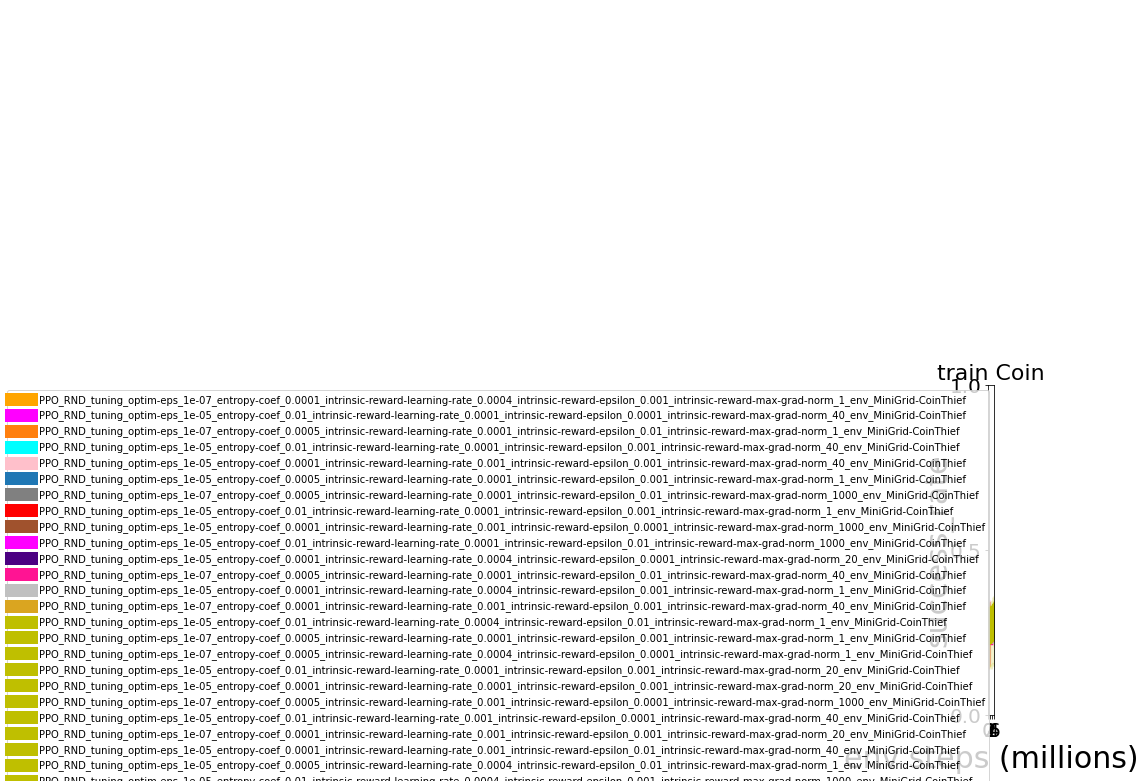

In [7]:
### test new evaluation
plot_data(include=[["Coin"]],
          title="train Coin", save=False, x_lim=6.0, y_lim=[0,1.0])
plot_data(include=[["Talk","06"]],
          title="train Talk", save=False, x_lim=6.0, y_lim=[0,1.0])

plot_data(include=[["Coin"]],
          title="Coin", save=False, x_lim=6.0, y_lim=[0,1.0], metric='test_success_rates')
plot_data(include=[["Talk","06"]],
          title="Talk", save=False, x_lim=6.0, y_lim=[0,1.0], metric='test_success_rates')

plot_data(include=[["Coin"]],
          title="Coin", save=False, x_lim=6.0, y_lim=[0,1.0], metric='test_success_rates')
plot_data(include=[["Talk","06"]],
          title="Talk", save=False, x_lim=6.0, y_lim=[0,1.0], metric='test_success_rates')

KeyError: '21-05_final_coinThief_env_args_few_actions_True_tag_visible_coins_True_npc_view_size_5_npc_look_around_True'

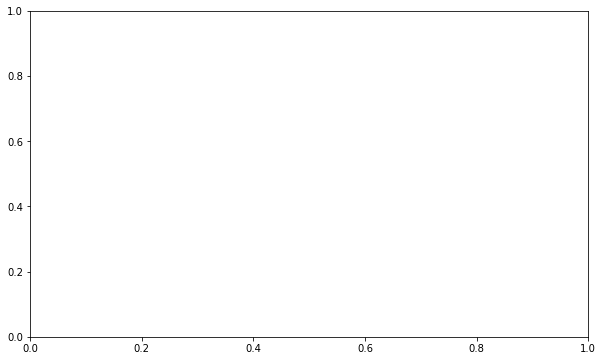

In [8]:
ppo = '21-05_final_coinThief_env_args_few_actions_True_npc_view_size_5_npc_look_around_True'
ppo_explo = '21-05_final_coinThief_env_args_few_actions_True_npc_view_size_5_npc_look_around_True_exploration-bonus-params_2_50'
ppo_hidden = '21-05_final_coinThief_env_args_few_actions_True_hidden_npc_True__npc_view_size_5_npc_look_around_True'

ppo_ez = '21-05_final_coinThief_env_args_few_actions_True_tag_visible_coins_True_npc_view_size_5_npc_look_around_True'
ppo_explo_ez = '21-05_final_coinThief_env_args_few_actions_True_tag_visible_coins_True_npc_view_size_5_npc_look_around_True_exploration-bonus-params_2_50'


format_dict = OrderedDict()
format_dict[ppo_ez] = ('PPO (coin tags)',"#043252")
format_dict[ppo_explo_ez] = ('PPO+Explo (coin tags)',"darkred")

format_dict[ppo_explo] = ('PPO+Explo','indianred')
format_dict[ppo] = ('PPO',"#1f77b4")
format_dict[ppo_hidden] = ('Unsocial PPO',"grey")

label_order = [ppo_ez, ppo_explo_ez,ppo_hidden, ppo, ppo_explo]

leg_args = {'ncol':2,
                        'columnspacing':1.0,
                        'handlelength':1.0,
                        'frameon':False,
              # X
                        'bbox_to_anchor':(0.00, 0.23, 0.10, .102),
                       'labelspacing':0.2,
                       'fontsize':27}


plot_data(include=[["coin"]],
          exclude=['debug'],
#          title="CoinThief (npc look around + reduced fov)",
          save=True, x_lim=30.0, y_lim=[0,1.0],
          format_dict=format_dict, leg_args=leg_args, smooth_coef=10, model_order=label_order,
         subsample_step = 50)

#get_welch(algo_0=ppo, algo_1=ppo_hidden, epoch=0, metric="bin_extrinsic_return_mean", verbose=True)
#get_welch(algo_0=ppo_explo_ez, algo_1=ppo_ez, epoch=0, metric="bin_extrinsic_return_mean", verbose=True)
#get_welch(algo_0=ppo_explo_ez, algo_1=ppo_explo, epoch=0, metric="bin_extrinsic_return_mean", verbose=True)

# plot_data(metric='rreturn_mean',
#           include=[["coin"]],
#           exclude=['4_50','3_50','2_50','hidden'],
#           title="CoinThief (npc look around + reduced fov)", save=True, x_lim=30.0)

# plot_data(metric='extrinsic_return_mean',
#           include=[["coin"]],
#           exclude=['4_50','3_50','2_50','hidden'],
#           title="CoinThief (npc look around + reduced fov)", save=True, x_lim=30.0)

In [ ]:
plot_data(include=[["dance"]],
          exclude=['debug'],
#          title="CoinThief (npc look around + reduced fov)",
          save=True, x_lim=30.0, y_lim=[0,1.0],
          format_dict=None, leg_args=leg_args)

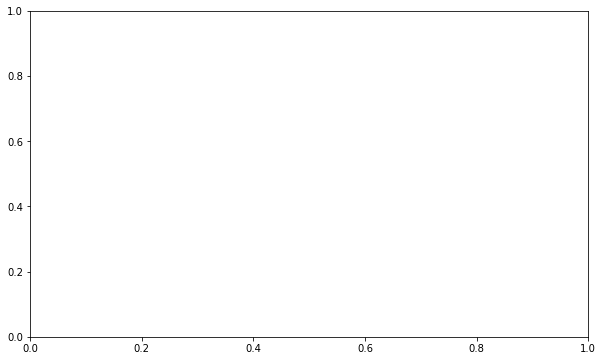

In [9]:
### Neurips 2021 - DANCE ENV PLOT

plot_data(include=[["dance"]],
          title="Dance", save=False, x_lim=30.0, y_lim=1.0)

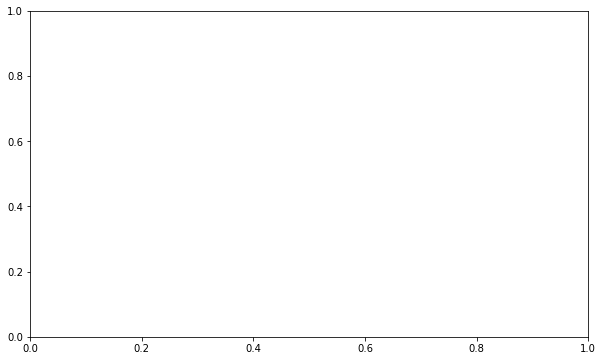

In [10]:
### Neurips 2021 - SocialEnv Plot

plot_data(include=[["social"]],
          title="SocialEnv (all envs)", save=True, x_lim=30.0, y_lim=1.0)

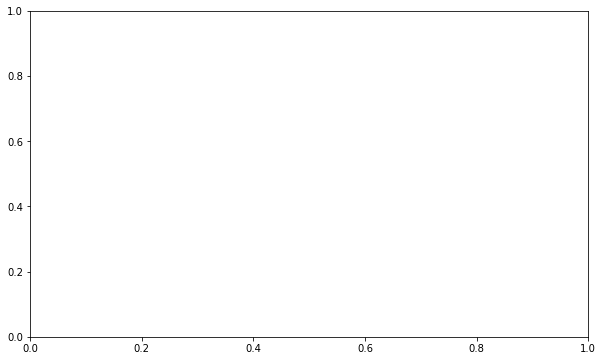

In [13]:
# PPO HP tuning plots

### test new evaluation
# plot_data(include=[["Coin"]],
#           title="train Coin", save=False, x_lim=6.0, y_lim=[0,1.0])
# plot_data(include=[["Talk","06"]],
#           title="train Talk", save=False, x_lim=6.0, y_lim=[0,1.0])

plot_data(include=[["Coin","recurrence_10","1280","0.01"]],
          title="Coin", save=False, x_lim=12.0, y_lim=[0,1.0], metric='test_success_rates')
# plot_data(include=[["Talk","06"]],
#           title="Talk", save=False, x_lim=12.0, y_lim=[0,1.0], metric='test_success_rates')

In [14]:
# QUICK END PERF STATS, NO CURVES

metric = "test_success_rates" #"bin_extrinsic_return_mean"
#ax = [ax]
max_y = -np.inf
min_y = np.inf
max_steps = 0
for i,m_id in enumerate(models_saves.keys()):
    #excluding some experiments
    if 'talk' in m_id:
        continue    
#     if not 'coin' in m_id:
#         continue
    #print(m_id)
    runs_data = models_saves[m_id]['data']
    last_ys = []
 
    # determine minimal run length across seeds
    min_len = np.min([len(run['frames']) for run in runs_data])
    
    #compute env steps (x axis)
    steps = np.array(runs_data[0]['frames'], dtype=np.int) / 1000000
    steps = steps[:min_len]
    
    seeds = []
    for run in runs_data:  
        #print(run.keys())
        data = run[metric]
        if len(data) > min_len:
            data = data[0:min_len]
        #print(data[0:5])
        last_ys.append(data[min_len-1])
        seeds.append(run["config"]["seed"])

    # computes stats
    percentiles = np.percentile(last_ys,[25,50,75])
    max_index = np.argmax(last_ys)
    max_perf = last_ys[max_index]
    max_perf_seed = seeds[max_index]
    label = preprocess_label(m_id)

    print("{}: {}M, {} +- {}, perc:{}, max:{} seed {}".format(label,
                                                           np.round(steps[-1],6),
                                                           np.round(np.mean(last_ys),2),
                                                           np.round(np.std(last_ys),2),
                                                           np.round(percentiles,2),
                                                           np.round(max_perf,2),
                                                           max_perf_seed))

PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief: 9.8304M, 0.35 +- 0.06, perc:[0.32 0.34 0.38], max:0.46 seed 7
PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief: 9.8304M, 0.28 +- 0.03, perc:[0.25 0.29 0.3 ], max:0.32 seed 0
PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite: 9.8304M, 0.0 +- 0.0, perc:[0. 0. 0.], max:0.0 seed 7
PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite: 9.8304M, 0.0 +- 0.0, perc:[0. 0. 0.], max:0.02 seed 7
PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.00

IndexError: list index out of range

In [15]:
# OVERALL EXPERIMENT CSV TABLE GENERATOR (USE https://www.tablesgenerator.com/ to turn into latex)
import csv

baseline = '22-06_final_toy_env_teacher_ALP-GMM'
RESULTS = [['Condition','Dance','CoinThief']]
# add 1 list per line, 1 tuple per col. (col. name, list of strings matching a run's name)
line_data = [('PPO',[[''],
                     ['coinThief_env_args_hidden_npc_False_few_actions_True']]),
             ('PPO+Explo',[['dance_len_3_exploration-bonus-params_4_50'],['_R_re'],['_R_gt']]),
             ('Random',[['Random'],'N/A','N/A'])]
#              ('IN-R',['CEGT_expert_type_R_pt']),
#              ()]
agent_types = ['t']
plt.ion()
print(labels.keys())
for line_d in line_data:
    result_line = [line_d[0]]
    # find conditions
    for cond_marker in line_d[1]:
        print(cond_marker)
        marker = cond_marker[0]
        print('find cond with {} in it'.format(marker))
        nb_found = 0
        for i,(m_id,label) in enumerate(labels.items()):
            if marker in m_id:
                print(m_id)
                nb_found += 1
                if nb_found > 1:
                    print('ERROR')
                # compute stats for condition
                runs_data = models_saves[m_id]['data']
                ys = []
                for run in runs_data:
                    data = run['epochs_score']
                    episodes = np.array(run['epochs_episode_nb'])
                    ys.append(data)
                assert len(ys) == 48

                mean_std = '{} +- {}'.format(np.round(np.mean(ys,axis=0)[-1],1),
                                                    np.round(np.std(ys,axis=0)[-1],1))
                # welch test w.r.t. to ALP-GMM
                welch_test = get_welch(algo_0=m_id, algo_1=baseline, verbose=True)
                if welch_test.statistic > 0:
                    if welch_test.pvalue < 0.01:
                        mean_std = mean_std + '(*)'
                
                result_line.append(mean_std)
    RESULTS.append(result_line)
print(RESULTS)
with open('output.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerows(RESULTS)

odict_keys(['22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.0004_intrinsic-reward-epsilon_0.001_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0', '22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.01_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_40_env_MiniGrid-CoinThief-8x8-v0', '22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0001_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_40_env_MiniGrid-TalkItOutPolite-8x8-v0', '22-09_PPO_RND_tuning_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1000_env_MiniGrid-TalkItOutPolite-8x8-v0', '22-09_PPO_RND_tuning_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.01_intrinsic-reward-max-grad-norm_1_env_MiniGrid-CoinThief-8x8-v0', '22-09_PPO_RND_t

KeyError: 'epochs_score'

In [26]:
from IPython import embed; embed()

Python 3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.16.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: 

In [1]: e
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-1-094e3afb2fe8> in <module>
----> 1 e

NameError: name 'e' is not defined

In [2]: exit



In [33]:
# PPO HYPERPARAMETER TUNING visualization and analysis tools

# get hyperparameter configuration id from an experiment id
def m_id_to_hp_id(m_id):
    hp_id = m_id[17:]
    
    # hp_id is environment agnostic
    hp_id = hp_id.replace('env_MiniGrid-TalkItOutPolite-8x8-v0','')
    hp_id = hp_id.replace('env_MiniGrid-CoinThief-8x8-v0','')
    hp_id = hp_id.replace('frames-per-proc','frames/proc')
    return hp_id
    

# Get top N configurations
N = 3
metric = "test_success_rates" #"bin_extrinsic_return_mean"
# (CoinThief perfs, TalkItOut perfs)
coin_env_idx = 0
talk_env_idx = 1
performance_dict = {m_id_to_hp_id(m_id):[None,None] for m_id in models_saves.keys()}

#ax = [ax]
max_y = -np.inf
min_y = np.inf
max_steps = 0
for i,m_id in enumerate(models_saves.keys()):
    
    if "Coin" in m_id:
        idx = coin_env_idx
    elif "Talk" in m_id:
        idx = talk_env_idx
    else:
        print("Unknown hyperparam env: {}".format(m_id))
        break
    
    # collect end performance for each seed
    runs_data = models_saves[m_id]['data']
    last_ys = []
#     from IPython import embed; embed()
    
    for run in runs_data: 
        data = run[metric]
        #print(len(data))
        if data is None: continue
        #assert (len(data) == 312) or (len(data) == 156) or (len(data) == 78),\
        #print("unknown data length: {}".format(len(data)))
        last_ys.append(data[-1])
    
    # average end performance and store it
    performance_dict[m_id_to_hp_id(m_id)][idx] = np.round(np.mean(last_ys),3)



# filter Nones
performance_dict = {k:v for k, v in performance_dict.items() if v[1] is not None and v[0] is not None}

#sort_fn = lambda kv: kv[1][talk_env_idx]
sort_fns = [lambda kv: kv[1][coin_env_idx],
            lambda kv: kv[1][talk_env_idx],
            lambda kv: np.mean(kv[1])]
N = [10,10,10]
sort_name = [' Coin Env perfs', 'Talk Env perfs', 'Coin+Talk perfs (mean)']
for sort_fn, n, name in zip(sort_fns, N, sort_name):
    print("\n Top {} {} \n".format(n,name))

    # sort by perf
    talk_sorted_perf = sorted(performance_dict.items(), key= sort_fn)
    talk_sorted_perf.reverse()

    # print top n
    talk_sorted_perf = OrderedDict(talk_sorted_perf)
    
    for i, (key, value) in enumerate(talk_sorted_perf.items()):
        if i > n:
            break
        print(key,':',value)

print(len(performance_dict.keys()))

Python 3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.16.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: exit()


 Top 10  Coin Env perfs 

ing_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_ : [0.362, 0.054]
ing_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1_ : [0.357, 0.231]
ing_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_ : [0.354, 0.075]
ing_optim-eps_1e-07_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.0001_intrinsic-reward-epsilon_0.0001_intrinsic-reward-max-grad-norm_1000_ : [0.352, 0.226]
ing_optim-eps_1e-05_entropy-coef_0.0005_intrinsic-reward-learning-rate_0.001_intrinsic-reward-epsilon_0.01_intr